# Inferential Statistics


In [65]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from IPython.display import Image, Latex, Math, display
from scipy.stats import bernoulli, binom, expon, gamma, norm, poisson, uniform
import scipy.stats.distributions as dist
import scipy.stats as stats
import random
import warnings

sns.set_theme(
    color_codes=True,
    rc={"figure.figsize": (5, 5)},
)
# sns.set_context("talk")

In [2]:
n = 10000
start = 10
width = 20

### Uniform Distribution


In [3]:
data_uniform = uniform.rvs(size=n, loc=start, scale=width)
data_uniform

array([19.33934133, 22.92881117, 19.11907312, ..., 26.6083509 ,
       11.30578945, 19.89464764], shape=(10000,))

[Text(0.5, 0, 'Uniform Distribution'), Text(0, 0.5, 'Frequency')]

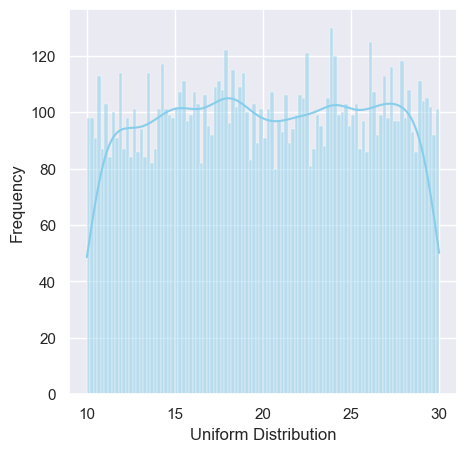

In [4]:
ax = sns.histplot(
    data=data_uniform,
    bins=100,
    kde=True,
    color="skyblue",
)
ax.set(xlabel="Uniform Distribution", ylabel="Frequency")

In [5]:
np.array(sorted(data_uniform))[np.array(sorted(data_uniform)) > 12]

array([12.0030264 , 12.0115141 , 12.01201977, ..., 29.99293167,
       29.99484102, 29.99705775], shape=(9021,))

### Normal Distribution


In [6]:
data_normal = norm.rvs(size=n, loc=0, scale=1)

[Text(0.5, 0, 'Normal Distribution'), Text(0, 0.5, 'Frequency')]

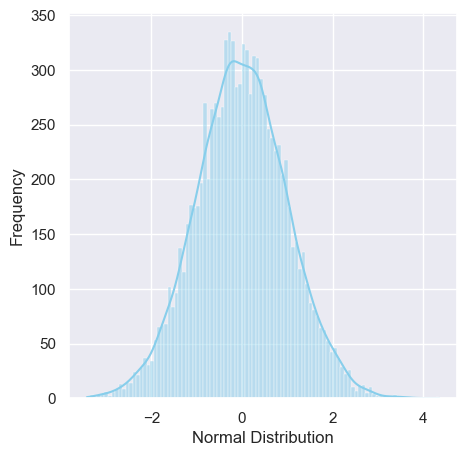

In [7]:
ax = sns.histplot(
    data_normal,
    bins=100,
    kde=True,
    color="skyblue",
)
ax.set(xlabel="Normal Distribution", ylabel="Frequency")

### Gamma Distribution


In [8]:
data_gamma = gamma.rvs(a=5, size=n)

[Text(0.5, 0, 'Gamma Distribution'), Text(0, 0.5, 'Frequency')]

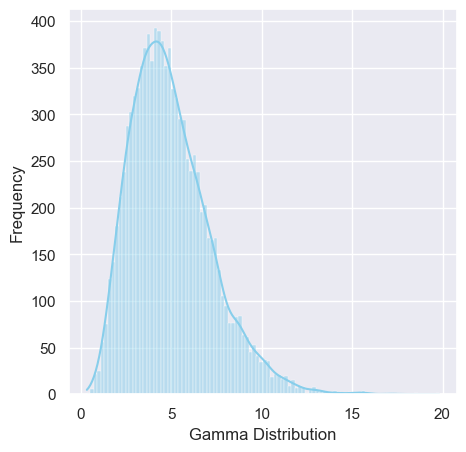

In [9]:
ax = sns.histplot(
    data_gamma,
    bins=100,
    kde=True,
    color="skyblue",
)
ax.set(xlabel="Gamma Distribution", ylabel="Frequency")

### Exponential Distribution


In [10]:
data_expon = expon.rvs(size=n, loc=0, scale=1)

[Text(0.5, 0, 'Exponential Distribution'), Text(0, 0.5, 'Frequency')]

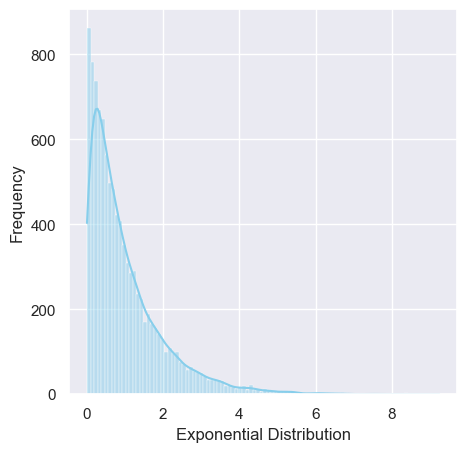

In [11]:
ax = sns.histplot(
    data_expon,
    bins=100,
    kde=True,
    color="skyblue",
)
ax.set(xlabel="Exponential Distribution", ylabel="Frequency")

### Poisson Distribution


In [12]:
data_poisson = poisson.rvs(size=n, mu=3)

[Text(0.5, 0, 'Poisson Distribution'), Text(0, 0.5, 'Frequency')]

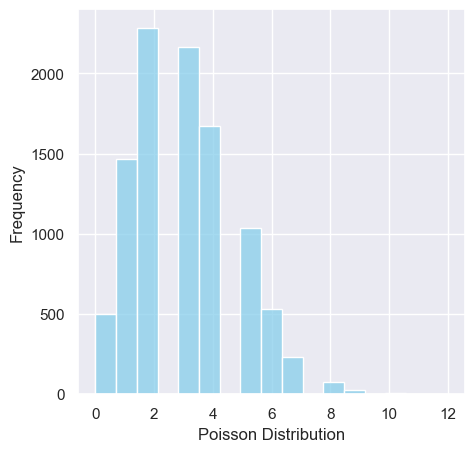

In [ ]:
ax = sns.histplot(
    data_poisson,
    bins=30,
    binwidth=0.7,
    color="skyblue",
)
ax.set(xlabel="Poisson Distribution", ylabel="Frequency")

### Binomial Distribution


In [14]:
data_binom = binom.rvs(n=10, p=0.8, size=n)

[Text(0.5, 0, 'Binomial Distribution'), Text(0, 0.5, 'Frequency')]

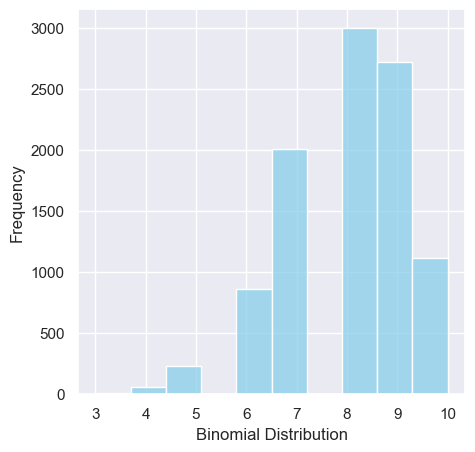

In [15]:
ax = sns.histplot(
    data_binom,
    bins=30,
    binwidth=0.7,
    color="skyblue",
)
ax.set(xlabel="Binomial Distribution", ylabel="Frequency")

### Bernoulli Distribution


In [16]:
data_bern = bernoulli.rvs(p=0.6, size=n)

[Text(0.5, 0, 'Bernoulli Distribution'), Text(0, 0.5, 'Frequency')]

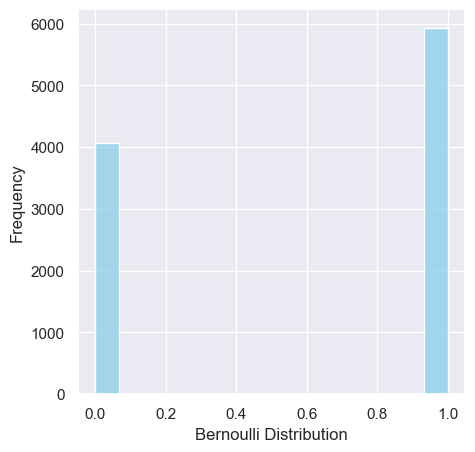

In [17]:
ax = sns.histplot(
    data_bern,
    # bins=30,
    # binwidth=0.7,
    color="skyblue",
)
ax.set(xlabel="Bernoulli Distribution", ylabel="Frequency")

# Confidence Interval


In [18]:
df = pd.read_csv("../data/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
df["sex1"] = df["sex"].replace({1: "Male", 0: "Female"})
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,sex1
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Male
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Male
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Male
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Male
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Female


In [ ]:
dx = df[["target", "sex1"]].dropna()
display(df.shape)
dx.head()

(1025, 15)

,target,sex1
0,0,Male
1,0,Male
2,0,Male
3,0,Male
4,0,Female


In [ ]:
pd.crosstab(dx["target"], dx["sex1"])

sex1,Female,Male
target,,
0,86,413
1,226,300


In [23]:
p_fm = 226 / (86 + 226)
p_fm

0.7243589743589743

In [24]:
n = 86 + 226

In [25]:
86 / n

0.27564102564102566

In [26]:
np.sqrt(0.72 * 0.27 / 312)

np.float64(0.02496150883013531)

In [27]:
se_female = np.sqrt(p_fm * (1 - p_fm) / n)
se_female

np.float64(0.02529714756803247)

In [28]:
ci = 0.95
alpha = 0.05
z_score = 1.96
lcb = p_fm - z_score * se_female  # lower boundary
ucb = p_fm + z_score * se_female  # upper boundary
lcb, ucb

(np.float64(0.6747765651256307), np.float64(0.773941383592318))

In [29]:
n * p_fm

226.0

In [30]:
sm.stats.proportion_confint(226, 312, alpha=0.01)

(0.6591978403570355, 0.7895201083609131)

In [31]:
df.groupby("sex1").agg({"chol": ["mean", "std", "count"]})

chol                 
              mean        std count
sex1                               
Female  261.455128  64.466781   312
Male    239.237027  43.155535   713

In [32]:
mean_fe = 261.45
sd = 64.4
n = 312
z = 1.96

In [33]:
se = sd / np.sqrt(n)
se

np.float64(3.6459320499455985)

In [34]:
lcb = mean_fe - z * se  # lower boundary
ucb = mean_fe + z * se  # upper boundary
lcb, ucb

(np.float64(254.3039731821066), np.float64(268.59602681789335))

In [35]:
np.random.seed(42)

In [36]:
normal_distribution_us_male_mass_pounds = np.random.normal(loc=181, scale=24, size=6000)
normal_distribution_us_female_mass_pounds = np.random.normal(
    loc=132, scale=22, size=6500
)
all_mass_values = np.concatenate(
    (
        normal_distribution_us_male_mass_pounds,
        normal_distribution_us_female_mass_pounds,
    ),
    axis=0,
)
df_ppl_mass = pd.DataFrame({"us_people_mass_pounds": all_mass_values})
df_ppl_mass.head()

,us_people_mass_pounds
0,192.921140
1,177.681657
2,196.544525
3,217.552717
4,175.380319


Text(0.5, 1.015, 'Distribution of Mass of People in U.S.')

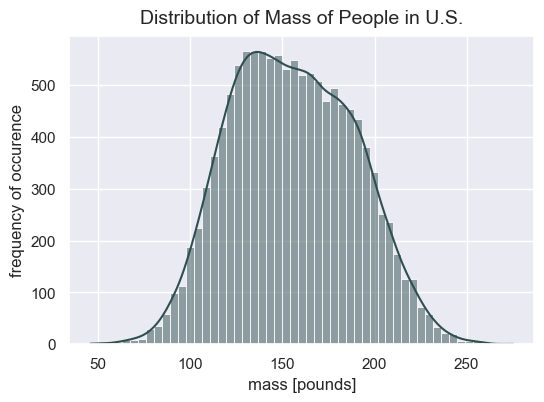

In [37]:
plt.figure(figsize=(6, 4))
sns.histplot(
    data=df_ppl_mass,
    x="us_people_mass_pounds",
    kde=True,
    color="darkslategrey",
)
plt.xlabel("mass [pounds]")
plt.ylabel("frequency of occurence")
plt.title("Distribution of Mass of People in U.S.", y=1.015, fontsize=14)

In [38]:
pop_mean_mass = df_ppl_mass["us_people_mass_pounds"].mean()
pop_mean_mass

np.float64(155.42328059423372)

In [39]:
pop_std_dev_mass = df_ppl_mass["us_people_mass_pounds"].std()
pop_std_dev_mass

np.float64(33.58519088395858)

In [40]:
np.random.choice(
    a=df_ppl_mass["us_people_mass_pounds"],
    size=25,
)

array([ 95.28829503, 176.48314147, 153.69086443, 129.04765084,
       122.02829043, 133.83359772, 165.2345373 , 119.6122163 ,
       147.72409801, 170.12252682, 145.15576532, 162.78719439,
       186.35874192, 151.94932   , 163.5454583 , 151.83803134,
       180.14018611,  99.77055559, 107.24564779, 218.2998501 ,
       184.14556447, 171.68216672, 173.5641335 , 128.02223621,
       171.32617626])

In [41]:
sample_means = []
n = 25
for sample in range(300):
    sample_values = np.random.choice(
        a=df_ppl_mass["us_people_mass_pounds"],
        size=n,
    )
    sample_mean = np.mean(sample_values)
    sample_means.append(sample_mean)

Text(0.5, 1.015, "Distribution of Sample Means ($n=25$) of People's Mass in Pounds")

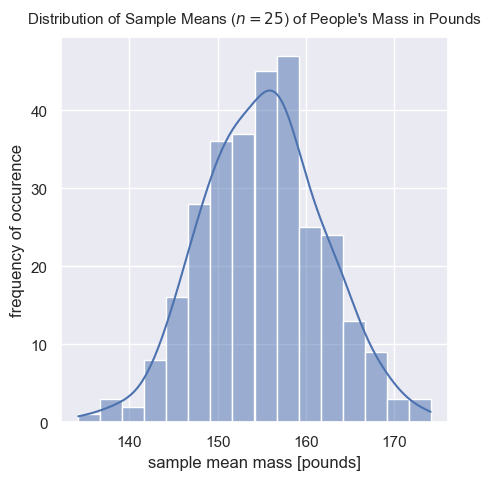

In [42]:
sns.histplot(sample_means, kde=True)
plt.xlabel("sample mean mass [pounds]")
plt.ylabel("frequency of occurence")
plt.title(
    "Distribution of Sample Means ($n=25$) of People's Mass in Pounds",
    y=1.015,
    fontsize=11,
)

In [43]:
median_of_sample_means = np.median(sample_means)
median_of_sample_means

np.float64(155.32636288934205)

In [44]:
df_ppl_mass["us_people_mass_pounds"].median()

np.float64(154.12339219484778)

In [45]:
pop_std_dev_mass

np.float64(33.58519088395858)

In [46]:
se = pop_std_dev_mass / np.sqrt(n)
se

np.float64(6.717038176791716)

## Hypothesis Testing


- Existing situation => A
- Changes => B
- A => B, apakah karena perubahan itu?


Hypothesis statement

- variable independent = x
- variable dependent = y / target

- H0 = null hypothesis = existing
- H1 = alt hypothesis = action / changes


In [47]:
n = 1018
pnull = 0.52
phat = 0.56

In [48]:
sm.stats.proportions_ztest(phat * n, n, pnull, alternative="larger")

(np.float64(2.571067795759113), np.float64(0.005069273865860533))

- alpha = 0.05
- p-value > alpha -> gagal menolak H0
- p-value <= alpha -> H0 ditolak


- H0: x <= 15
- H1: x > 15


## Two tailed hypothesis testing


In [49]:
da = pd.read_csv("../data/nhanes_2015_2016.csv")
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


- H0: mu1==mu2 (BMI wanita = BMI laki2)
- H1: mu1!=mu2 (BMI wanita != BMI laki2)


In [50]:
females = da[da["RIAGENDR"] == 2]
males = da[da["RIAGENDR"] == 1]

In [51]:
n1 = len(females)
mu1 = females["BMXBMI"].mean()
sd1 = females["BMXBMI"].std()

n1, mu1, sd1

(2976, np.float64(29.93994565217392), np.float64(7.753318809545674))

In [52]:
n2 = len(males)
mu2 = males["BMXBMI"].mean()
sd2 = males["BMXBMI"].std()

n2, mu2, sd2

(2759, np.float64(28.778072111846942), np.float64(6.2525676168014614))

In [53]:
sm.stats.ztest(
    females["BMXBMI"].dropna(), males["BMXBMI"].dropna(), alternative="two-sided"
)

(np.float64(6.1755933531383205), np.float64(6.591544431126401e-10))

p-value < alpha. Sehingga H0 ditolak


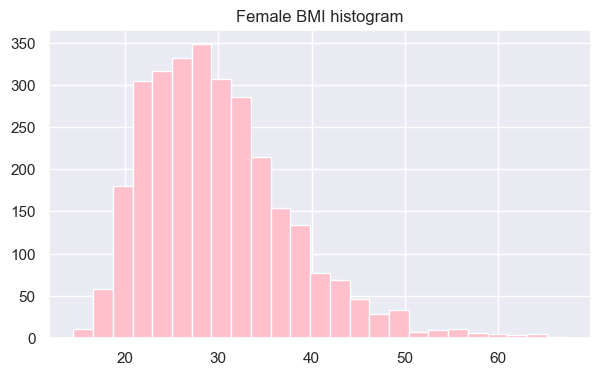

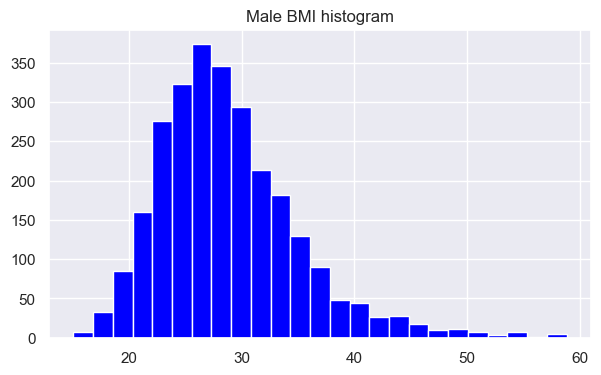

In [56]:
plt.figure(figsize=(7, 4))
plt.title("Female BMI histogram")
plt.hist(females["BMXBMI"].dropna(), color="pink", bins=25)

plt.figure(figsize=(7, 4))
plt.title("Male BMI histogram")
plt.hist(males["BMXBMI"].dropna(), color="blue", bins=25)

plt.show()

## One tailed hypothesis testing


- H0: prob <= .42
- H1: prob > .42


In [58]:
p_us = len(df[df["target"] == 1]) / len(df)
p_us

0.5131707317073171

In [59]:
df["target"].mean()

np.float64(0.5131707317073171)

In [60]:
se = np.sqrt(0.42 * (1 - 0.42) / len(df))
se

np.float64(0.015416177755376521)

In [62]:
be = p_us
he = 0.42
test_stat = (be - he) / se
test_stat

np.float64(6.04369858636477)

In [67]:
pvalue = 2 * dist.norm.cdf(-np.abs(test_stat))
pvalue

np.float64(1.5062078087269162e-09)

p-value < alpha. Sehingga H0 ditolak. Artinya, probabilitas US, lebih besar daripada .42
